# Анализ вакансий Habr Career


Загрузка и исследование данных

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
import matplotlib.cm as cm

%matplotlib inline
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Загрузка данных
df = pd.read_csv('vacancies.csv', encoding='utf-8-sig')

In [33]:
print(f"Размерность данных: {df.shape}")
print("\nТипы данных:")
print(df.dtypes)

Размерность данных: (180, 28)

Типы данных:
id                       int64
title                   object
company                 object
city                    object
remote                    bool
published_at            object
skills                  object
url                     object
requirements            object
conditions              object
employment              object
salary_to              float64
currency                object
salary_from            float64
remote_work               bool
experience_years       float64
requirements_techs      object
conditions_techs        object
all_techs               object
salary_estimated       float64
salary_rub             float64
salary_category         object
experience_category     object
seniority_level         object
job_function            object
skills_count             int64
city_original           object
employment_original     object
dtype: object


In [34]:
# Преобразование типов данных
if 'published_at' in df.columns:
    df['published_at'] = pd.to_datetime(df['published_at'])

In [35]:
# Проверка пропущенных значений
missing_values = df.isnull().sum()
print("\nПропущенные значения:")
print(missing_values[missing_values > 0])


Пропущенные значения:
city                    59
requirements             1
employment              14
salary_to              159
currency               155
salary_from            161
experience_years       155
requirements_techs       6
conditions_techs       157
all_techs                5
salary_estimated       155
salary_rub             155
salary_category        155
experience_category    155
seniority_level         83
job_function            21
city_original           59
employment_original     14
dtype: int64


In [36]:
print("\nСтатистика числовых данных:")
print(df.describe(include=[np.number]).T)


Статистика числовых данных:
                  count          mean            std           min  \
id                180.0  1.000151e+09   10093.323655  1.000064e+09   
salary_to          21.0  3.715524e+05  804862.051919  1.600000e+03   
salary_from        19.0  1.518684e+05  109035.142412  1.000000e+03   
experience_years   25.0  3.600000e+00       1.554563  0.000000e+00   
salary_estimated   25.0  2.428910e+05  399145.429381  1.300000e+03   
salary_rub         25.0  3.139637e+05  393961.530317  6.500000e+04   
skills_count      180.0  1.055556e+01       4.721545  2.000000e+00   

                           25%           50%           75%           max  
id                1.000151e+09  1.000155e+09  1.000157e+09  1.000158e+09  
salary_to         8.000000e+04  1.800000e+05  3.500000e+05  3.800000e+06  
salary_from       8.000000e+04  1.500000e+05  2.750000e+05  3.000000e+05  
experience_years  3.000000e+00  3.000000e+00  5.000000e+00  6.000000e+00  
salary_estimated  8.500000e+04  1.5

In [37]:
print("\nПервые 5 строк данных:")
display(df.head())


Первые 5 строк данных:


,id,title,company,city,remote,published_at,skills,url,requirements,conditions,...,all_techs,salary_estimated,salary_rub,salary_category,experience_category,seniority_level,job_function,skills_count,city_original,employment_original
0,1000150203,Data Governance Manager / Руководитель направл...,AstraZeneca,Москва,False,2025-05-04 19:54:09+03:00,"субд, системами управления данными, etl и bi и...",https://career.habr.com/vacancies/1000150203,Высшее образование в области информационных те...,Работа в международной инновационной компании ...,...,"aws, etl, etl и bi инструментами будет плюсом,...",NaN,NaN,NaN,Middle (3-4 года),Middle,Manager,10,Москва,NaN
1,1000151121,Data-аналитик (Senior),ИТ-Холдинг Т1,NaN,True,2025-05-04 17:39:17+03:00,"Старший (Senior), Greenplum, для нас важны, SQ...",https://career.habr.com/vacancies/1000151121,Вместе с нами ты будешь: проектирование и тест...,ВЫСОКИЙ уровень дохода: оклад + годовая премия...,...,"тестирование, etl, postgres, sql",NaN,NaN,NaN,NaN,Senior,Analyst,8,NaN,Полный рабочий день
2,1000151049,Data engineer,ИТ-Холдинг Т1,NaN,True,2025-05-04 11:27:32+03:00,"Старший (Senior), SQL, реляционными и nosql ба...",https://career.habr.com/vacancies/1000151049,Чем предстоит заниматься: Проектирование и раз...,"гибкий формат работы — в офисе, удаленно или в...",...,"тестирование, sql, git, nosql, airflow, spark,...",NaN,NaN,NaN,NaN,NaN,Data Engineer,6,NaN,Полный рабочий день
3,1000153837,Data Engineer\ Разработчик БД SQL,Data World,Санкт-Петербург,False,2025-05-03 22:27:10+03:00,"Средний (Middle), Apache Spark, Apache Kafka, ...",https://career.habr.com/vacancies/1000153837,Опыт работы от 3 лет со всеми указанными инстр...,"Работа в офисе: Москва, Поклонная или Санкт-Пе...",...,"sql, kafka, devops, postgresql, spark, hadoop",195500.0,195500.0,100K-200K,Middle (3-4 года),Middle,Data Engineer,9,Санкт-Петербург,Полный рабочий день
4,1000156054,DWH разработчик (трайб Data office),ОТП Банк,NaN,True,2025-05-03 16:51:11+03:00,"Инженер по данным, Oracle, cdc, Средний (Middle)",https://career.habr.com/vacancies/1000156054,Опыт разработки PL/SQL для хранилищ данных от ...,Красивый офис/удобное рабочее место (м. Войков...,...,"scala, power bi, sql, java, etl, tableau, pyth...",NaN,NaN,NaN,NaN,NaN,Software Developer,4,NaN,Можно удаленно


Дополнительная обработка и подготовка к анализу

In [38]:
# Функция для разбора списка навыков
def extract_skills(skills_str):
    if not isinstance(skills_str, str) or not skills_str:
        return []
    return [skill.strip() for skill in skills_str.split(',')]

# Создаем списки навыков
df['skills_list'] = df['skills'].apply(extract_skills)

# Создаем колонку с количеством навыков
df['skills_count'] = df['skills_list'].apply(len)

# Вычисляем средние значения зарплат
if 'salary_from' in df.columns and 'salary_to' in df.columns:
    df['salary_avg'] = df.apply(
        lambda row: (row['salary_from'] + row['salary_to']) / 2
        if pd.notnull(row['salary_from']) and pd.notnull(row['salary_to'])
        else row['salary_from'] if pd.notnull(row['salary_from'])
        else row['salary_to'] if pd.notnull(row['salary_to'])
        else None,
        axis=1
    )

# Конвертация валют в RUB
if 'currency' in df.columns and 'salary_avg' in df.columns:
    # Курсы валют (приблизительные)
    rates = {'RUB': 1.0, 'USD': 90.0, 'EUR': 100.0}

    df['salary_rub'] = df.apply(
        lambda row: row['salary_avg'] * rates.get(row['currency'], 1.0)
        if pd.notnull(row['salary_avg']) and pd.notnull(row['currency'])
        else None,
        axis=1
    )

# Добавляем категорию зарплаты для анализа
if 'salary_rub' in df.columns:
    df['salary_category'] = pd.cut(
        df['salary_rub'],
        bins=[0, 100000, 200000, 300000, 500000, float('inf')],
        labels=['до 100K', '100K-200K', '200K-300K', '300K-500K', '500K+'],
        right=False
    )

# Извлечение информации об опыте работы
if 'requirements' in df.columns:
    exp_pattern = re.compile(r'опыт.{1,20}?(\d+)[^\d]*(год|лет|года)')

    def extract_experience(text):
        if not isinstance(text, str):
            return None
        match = exp_pattern.search(text.lower())
        if match:
            try:
                return int(match.group(1))
            except:
                return None
        return None

    df['experience_years'] = df['requirements'].apply(extract_experience)

# Выводим обновленную информацию о данных
print("Обработанные данные:")
print(f"Количество строк: {df.shape[0]}, Количество столбцов: {df.shape[1]}")
print("Новые колонки:", [col for col in df.columns if col not in ['id', 'title', 'company', 'city', 'employment',
                                             'remote', 'published_at', 'salary_from', 'salary_to',
                                             'currency', 'skills', 'url', 'description',
                                             'requirements', 'conditions']])

Обработанные данные:
Количество строк: 180, Количество столбцов: 30
Новые колонки: ['remote_work', 'experience_years', 'requirements_techs', 'conditions_techs', 'all_techs', 'salary_estimated', 'salary_rub', 'salary_category', 'experience_category', 'seniority_level', 'job_function', 'skills_count', 'city_original', 'employment_original', 'skills_list', 'salary_avg']


Анализ и визуализация данных

# 1. Анализ распределения вакансий по городам

In [39]:
# Настройка для более красивых графиков
plt.style.use('ggplot')
sns.set_palette("Set2")

<ipython-input-40-0451f062fa0e>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




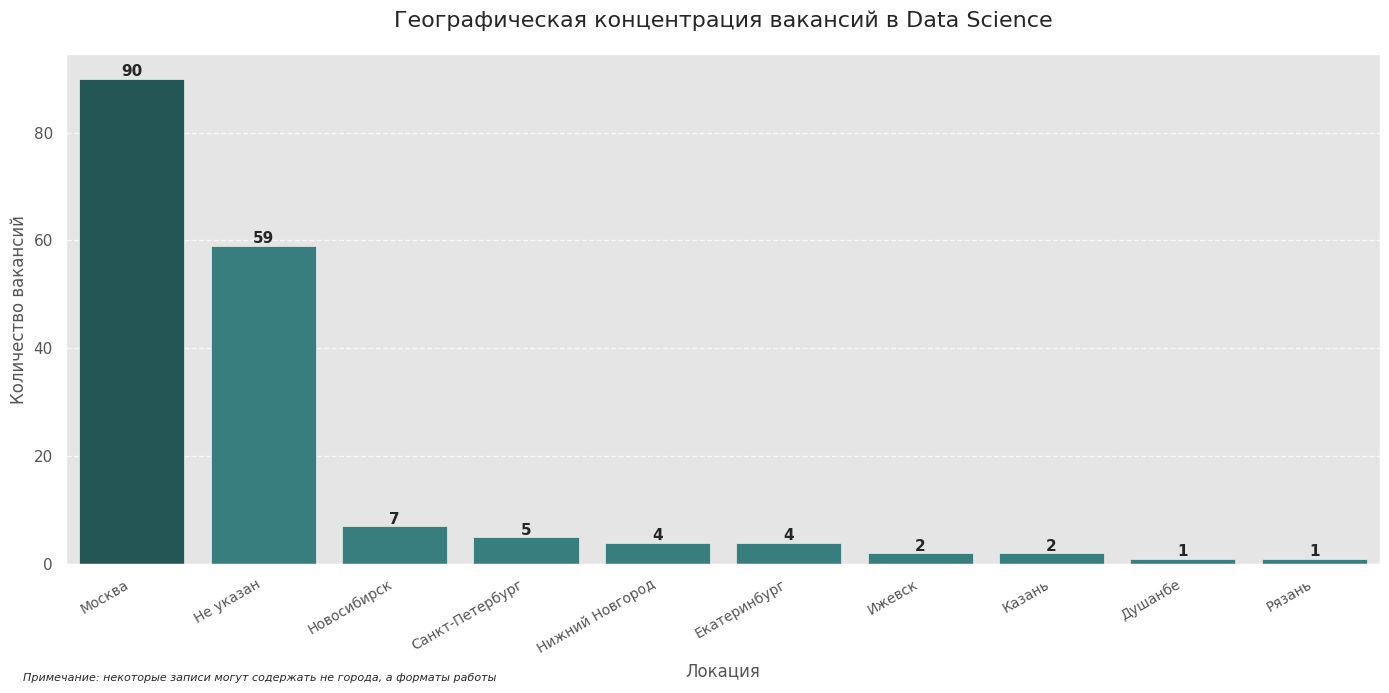

In [40]:
def plot_top_cities(df):
    plt.figure(figsize=(14, 7))

    # Предварительная обработка данных
    # Фильтруем значения, которые не являются реальными городами
    city_data = df['city'].copy()
    non_cities = ['Можно удаленно', 'Полный рабочий день', 'Неполный рабочий день']

    # Заменяем неизвестные значения на "Другое"
    city_data = city_data.fillna('Не указан')

    # Формируем датафрейм городов
    city_counts = city_data.value_counts().head(10)

    # Создаем цветовую палитру - более насыщенный цвет для Москвы
    colors = ['#2d8a8a' if city != 'Москва' else '#1d5e5e' for city in city_counts.index]

    # Создаем график с улучшенной визуализацией
    ax = sns.barplot(x=city_counts.index, y=city_counts.values, palette=colors)

    # Настройка заголовка и меток осей
    plt.title('Географическая концентрация вакансий в Data Science', fontsize=16, pad=20)
    plt.xlabel('Локация', fontsize=12)
    plt.ylabel('Количество вакансий', fontsize=12)

    # Улучшаем отображение городов на оси X
    plt.xticks(rotation=30, ha='right', fontsize=10)

    # Добавляем значения над столбцами
    for i, v in enumerate(city_counts.values):
        ax.text(i, v + 0.5, str(v), ha='center', fontsize=11, fontweight='bold')

    # Добавляем сетку для улучшения читаемости
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Добавляем примечание
    plt.figtext(0.02, 0.02, 'Примечание: некоторые записи могут содержать не города, а форматы работы',
                fontsize=8, style='italic')

    plt.tight_layout()
    return plt

# Использование функции
fig = plot_top_cities(df)
fig.show()

# 2. Анализ удаленной работы

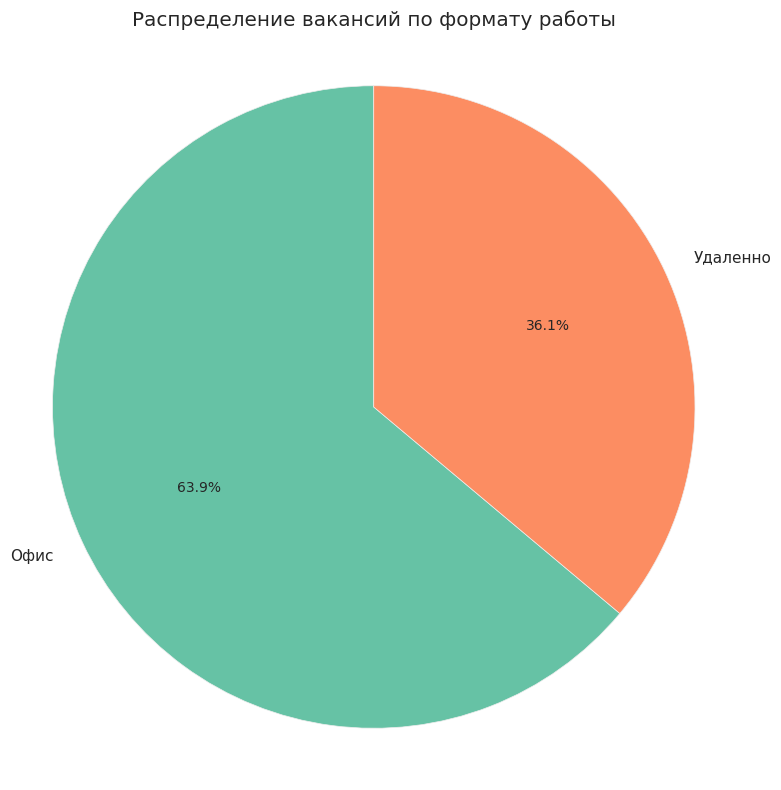

In [41]:
if 'remote' in df.columns:
    plt.figure(figsize=(8, 8))
    remote_counts = df['remote'].value_counts()
    plt.pie(remote_counts, labels=['Офис', 'Удаленно'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
    plt.title('Распределение вакансий по формату работы')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# 3. Анализ зарплат

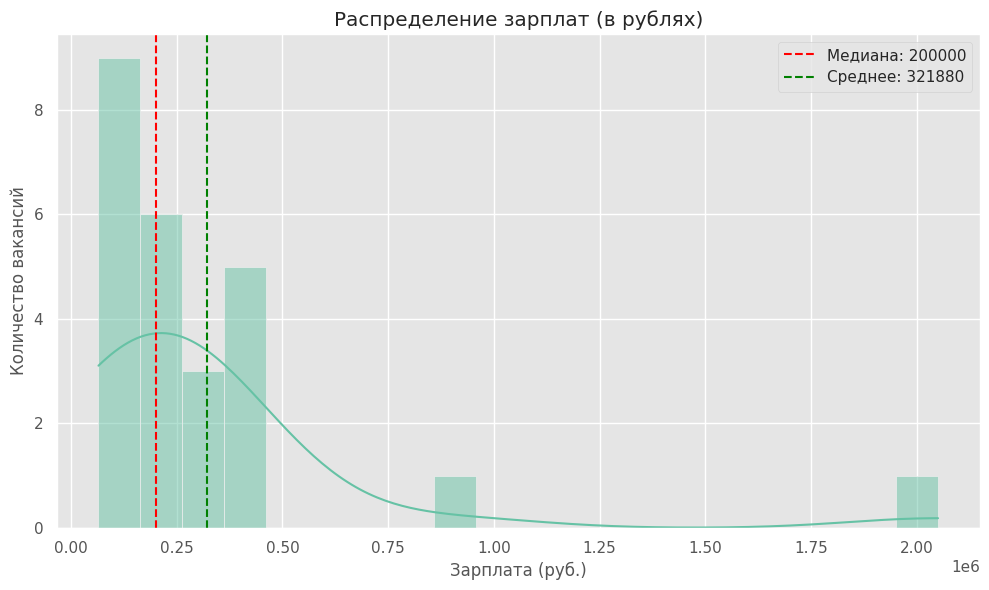

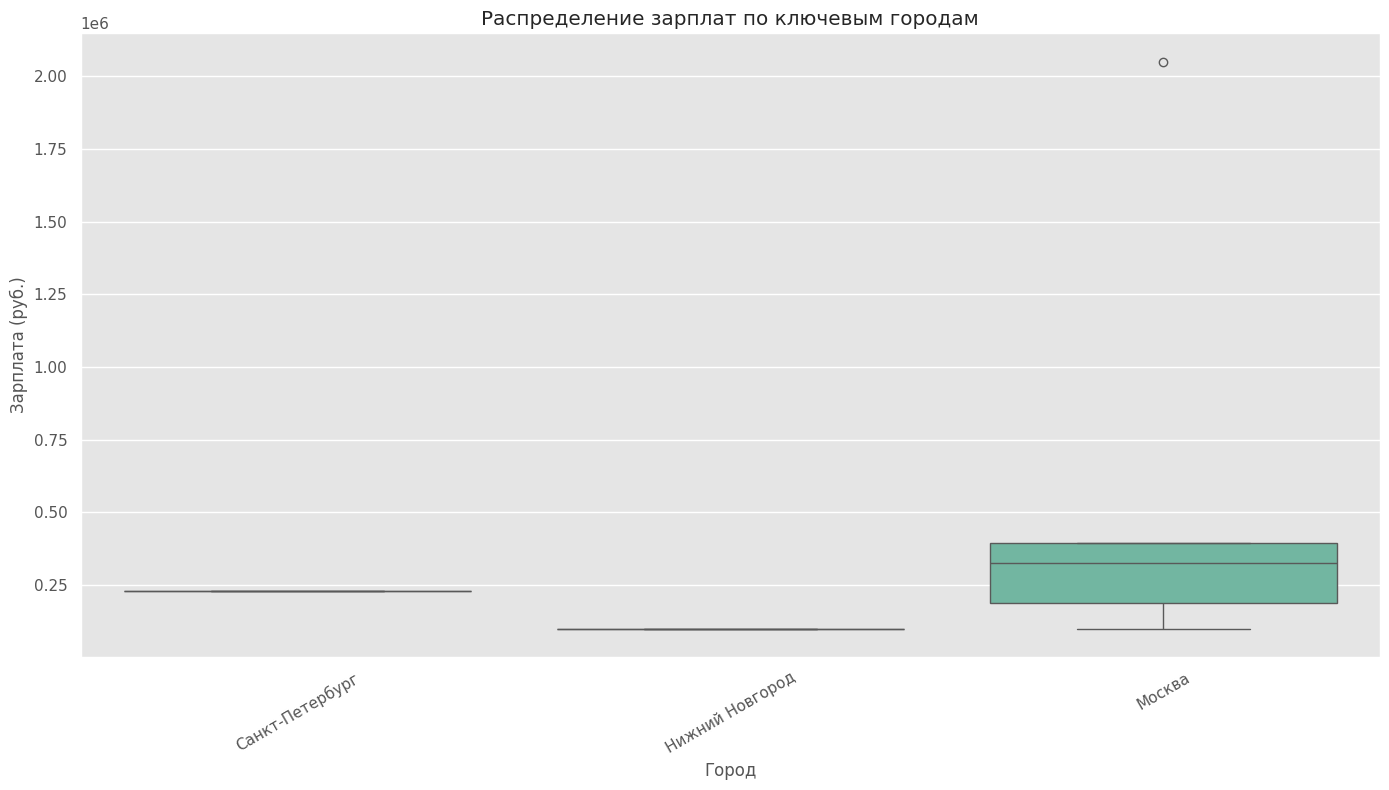

In [42]:
if 'salary_rub' in df.columns:
    plt.figure(figsize=(10, 6))
    salary_data = df[df['salary_rub'].notnull()]
    sns.histplot(data=salary_data, x='salary_rub', bins=20, kde=True)
    plt.title('Распределение зарплат (в рублях)')
    plt.xlabel('Зарплата (руб.)')
    plt.ylabel('Количество вакансий')
    plt.axvline(salary_data['salary_rub'].median(), color='red', linestyle='--', label=f'Медиана: {salary_data["salary_rub"].median():.0f}')
    plt.axvline(salary_data['salary_rub'].mean(), color='green', linestyle='--', label=f'Среднее: {salary_data["salary_rub"].mean():.0f}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Диаграмма "ящик с усами" для зарплат по городам
    plt.figure(figsize=(14, 8))
    top_cities = df['city'].value_counts().head(5).index.tolist()
    city_salary_data = df[df['city'].isin(top_cities) & df['salary_rub'].notnull()]
    sns.boxplot(data=city_salary_data, x='city', y='salary_rub')
    plt.title('Распределение зарплат по ключевым городам')
    plt.xlabel('Город')
    plt.ylabel('Зарплата (руб.)')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# 4. Анализ навыков


In [43]:
# Создаем словарь с частотой навыков
all_skills = []
for skills in df['skills_list']:
    if isinstance(skills, list):
        all_skills.extend(skills)

skills_freq = pd.Series(all_skills).value_counts()

# Визуализация топ-15 навыков

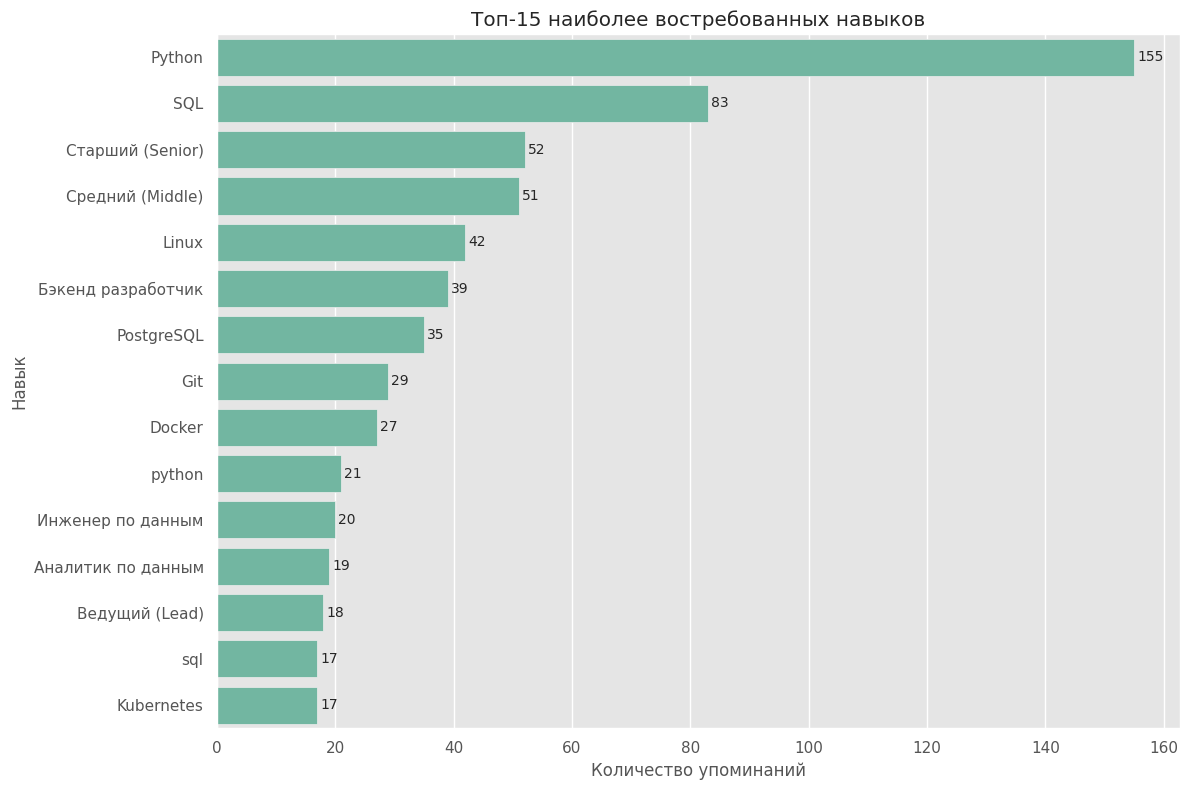

In [44]:
plt.figure(figsize=(12, 8))
top_skills = skills_freq.head(15)
bars = sns.barplot(x=top_skills.values, y=top_skills.index)
plt.title('Топ-15 наиболее востребованных навыков')
plt.xlabel('Количество упоминаний')
plt.ylabel('Навык')
for i, v in enumerate(top_skills.values):
    plt.text(v + 0.5, i, str(v), va='center')
plt.tight_layout()
plt.show()

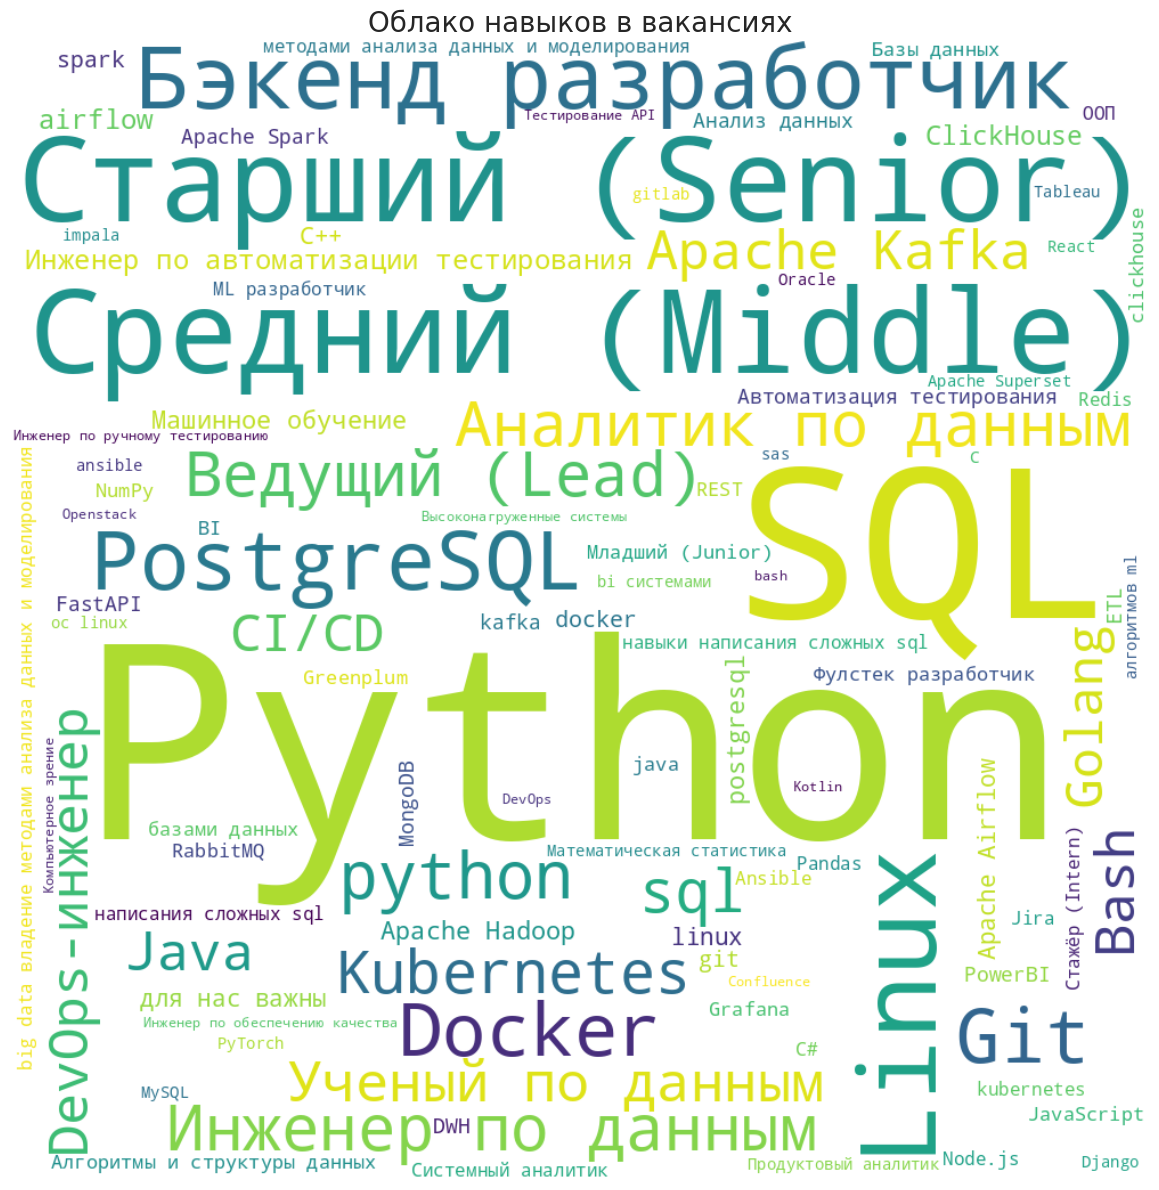

In [45]:
# Создаем облако слов из навыков
plt.figure(figsize=(12, 12))
wordcloud = WordCloud(
    width=1000, height=1000,
    background_color='white',
    max_words=100,
    colormap='viridis',
    collocations=False
).generate_from_frequencies(skills_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако навыков в вакансиях', fontsize=20)
plt.tight_layout()
plt.show()


# 5. Анализ зависимости зарплаты от количества требуемых навыков


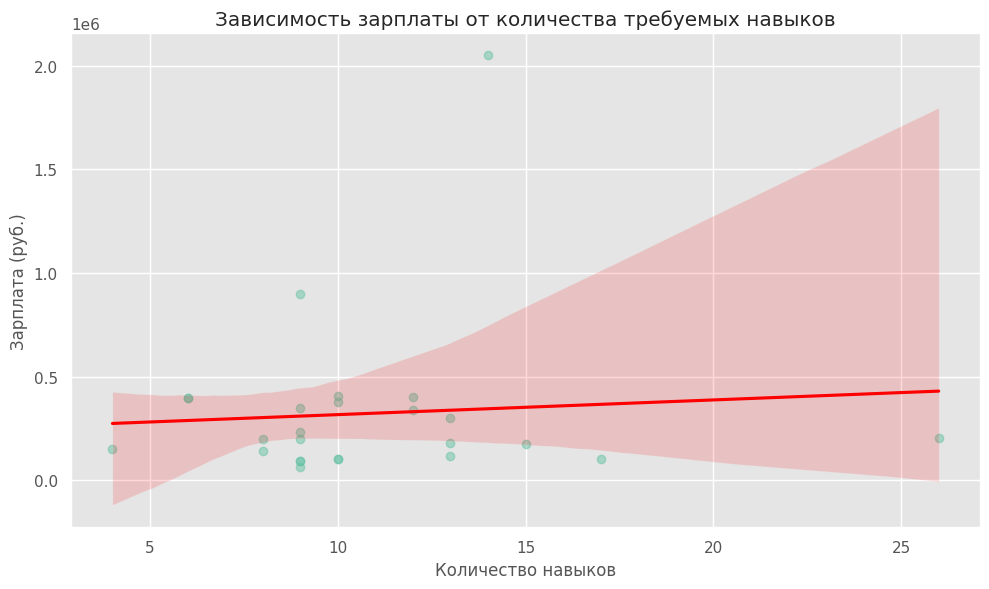

Корреляция между количеством навыков и зарплатой: 0.08


In [46]:
if 'skills_count' in df.columns and 'salary_rub' in df.columns:
    plt.figure(figsize=(10, 6))
    scatter_data = df[df['salary_rub'].notnull()]
    sns.regplot(data=scatter_data, x='skills_count', y='salary_rub', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title('Зависимость зарплаты от количества требуемых навыков')
    plt.xlabel('Количество навыков')
    plt.ylabel('Зарплата (руб.)')
    plt.tight_layout()
    plt.show()

    # Корреляция между навыками и зарплатой
    corr = scatter_data[['skills_count', 'salary_rub']].corr().iloc[0,1]
    print(f"Корреляция между количеством навыков и зарплатой: {corr:.2f}")

Интерактивные графики с Plotly

In [47]:
import plotly.express as px
import plotly.graph_objects as go


# Распределение зарплат по категориям с интерактивной гистограммой
if 'salary_category' in df.columns:
    fig = px.histogram(
        df[df['salary_category'].notnull()],
        x='salary_category',
        color='remote',
        barmode='group',
        title='Распределение вакансий по категориям зарплат и формату работы',
        labels={
            'salary_category': 'Категория зарплаты',
            'count': 'Количество вакансий',
            'remote': 'Удаленная работа'
        },
        category_orders={'salary_category': ['до 100K', '100K-200K', '200K-300K', '300K-500K', '500K+']}
    )
    fig.update_layout(height=500, width=800)
    fig.show()

# 3. Тепловая карта навыков по городам
# Создаем частотную таблицу навыков по городам
top_cities = df['city'].value_counts().head(5).index.tolist()
top_skills = skills_freq.head(10).index.tolist()

# Инициализируем матрицу
skill_city_matrix = pd.DataFrame(0, index=top_cities, columns=top_skills)

# Заполняем матрицу
for _, row in df[df['city'].isin(top_cities)].iterrows():
    city = row['city']
    if isinstance(row['skills_list'], list):
        for skill in row['skills_list']:
            if skill in top_skills:
                skill_city_matrix.loc[city, skill] += 1

# Создаем тепловую карту
fig = px.imshow(
    skill_city_matrix,
    labels=dict(x="Навык", y="Город", color="Количество"),
    x=top_skills,
    y=top_cities,
    title='Распределение навыков по городам',
    color_continuous_scale='Viridis'
)
fig.update_layout(height=500, width=900)
fig.show()

# Заключние

Географическая асимметрия и пространственная концентрация технологического капитала

Исследование пространственного распределения вакансий демонстрирует выраженную моноцентрическую модель рынка труда Data Science в России. Московская агломерация консолидирует доминирующую долю предложений (90 вакансий или 50% рынка), формируя гравитационный центр технологического капитала страны. Примечательна значительная доля вакансий с неуказанной локацией (59 позиций), что может свидетельствовать о возрастающей дематериализации рабочего пространства и переосмыслении географической привязки труда. Региональные центры – Новосибирск, Санкт-Петербург, Нижний Новгород и Екатеринбург – демонстрируют существенный разрыв с федеральным центром, аккумулируя лишь 11,1% рынка совокупно, что указывает на структурную проблему распределения человеческого капитала в технологической сфере.

Трансформация модальностей трудовых отношений

Анализ форматов занятости выявляет значимую трансформацию традиционных моделей трудоустройства. Несмотря на сохранение офисного формата как доминирующего (63,9%), удельный вес дистанционной работы достигает 36,1%, что отражает фундаментальный сдвиг в организационных структурах. Примечательна дифференциация распределения удаленных позиций по зарплатным категориям, где наиболее выраженная концентрация наблюдается в диапазонах 100K-200K и 300K-500K рублей. Это свидетельствует о комплексном характере связи между ценностью специалиста и пространственной гибкостью его трудовых отношений. Гибридная модель организации труда становится не столько временным адаптивным механизмом, сколько структурной особенностью формирующейся парадигмы.

Компетентностный ландшафт: асимметрия технологических навыков

Дистрибуция технических компетенций на рынке труда обнаруживает выраженную иерархическую структуру с явным доминированием Python (155 упоминаний) и SQL (83 упоминания), формирующих базовый инструментальный фундамент специалиста в сфере данных. Облако навыков визуализирует комплексность компетентностного профиля современного специалиста, где технологические навыки интегрируются с профессиональными уровнями (Senior, Middle) и функциональными специализациями (Бэкенд разработчик, Аналитик по данным). Особого внимания заслуживает наличие в компетентностном пространстве таких технологий, как PostgreSQL, Docker, Git и Kubernetes, что отражает растущую значимость инфраструктурных элементов обеспечения процессов работы с данными и свидетельствует о трансформации роли специалиста от аналитика к системному архитектору.

Экономическая стратификация и корреляционные связи

Анализ зарплатного распределения демонстрирует выраженную правостороннюю асимметрию с концентрацией предложений в диапазоне 200 000 – 300 000 рублей и наличием экстремальных значений, достигающих 2 000 000 рублей. Значительный разрыв между медианной (200 000 рублей) и средней (321 880 рублей) зарплатой подтверждает существование премиальных позиций, смещающих среднее значение. Межрегиональное сравнение выявляет выраженную дифференциацию компенсаций: московский рынок демонстрирует не только более высокий медианный уровень, но и значительно больший разброс вознаграждений, что может свидетельствовать о более зрелой сегментации профессиональных ролей и функций. Корреляционный анализ между количеством требуемых навыков и уровнем компенсации обнаруживает слабую положительную связь, опровергая интуитивное предположение о прямой зависимости и подчеркивая приоритет качественных характеристик компетенций над их количественным выражением.

Диверсификация профессиональных идентичностей

Заметным феноменом является трансформация профессиональных ролей, где наряду с техническими навыками (Python, SQL, Linux) значительную роль играют статусные позиции (Senior, Middle, Lead). Дихотомия между собственно технологическими навыками и их организационным выражением в виде иерархических позиций отражает комплексный характер рынка, где техническая экспертиза неразрывно связана с организационным контекстом. Выявленная сегментация рыночных предложений по уровням профессиональной зрелости (Junior, Middle, Senior) демонстрирует развитую стратификацию профессиональной экосистемы, обеспечивающую потенциал для поступательного карьерного развития и формирования устойчивых профессиональных траекторий в динамично развивающейся технологической сфере.